In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   ------------------------------ --------- 317.4/413.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.6 MB/s eta 0:00:00
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Un

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install tensorflow-text

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_text-2.10.0-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached tensorflow-2.10.1-cp310-cp310-win_amd64.whl.metadata (3.1 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
  Using cached tensorboard-2.10.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow_text-2.10.0-cp310-cp310-win_amd64.whl (5.0 MB)
   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/455.9 MB 1.3 MB/s eta 0:05:49
   ---------------------------------------- 0.2/455.9 MB 1.7 MB/s eta 0:04:22
   ---------------------------------------- 0.4/455.9 MB 2.0 MB/s eta 0:03:53
   ---------------------------------------- 0.4/455.9 MB 1.8 MB/s eta 0:04:10
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.33.0 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.16.1 requires keras>=3.0.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.16.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.16.1 requires tensorboard<2.17,>=2.16, but you have tensorboard 2.10.1 which is incompatible.


In [4]:
!pip install tensorflow-hub

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install tensorflow-addons

Defaulting to user installation because normal site-packages is not writeable

In [1]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

# Suppressing tf.hub warnings
tf.get_logger().setLevel("ERROR")

C:\Users\Shree Hari\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Shree Hari\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, d

In [2]:
import os

# Define the root directory
root_dir = r"F:\IEMOCAP123"

# Define the subdirectories
annotations_dir = os.path.join(root_dir, "annotations")
transcription_dir = os.path.join(root_dir,"transcriptions")
images_dir = os.path.join(root_dir, "Images")
extracted_img = os.path.join(images_dir, "extracted_images")
videos = os.path.join(images_dir, "videos")
tfrecords_dir = os.path.join(root_dir, "tfrecords")

# List all text files in the annotations directory
annotation_files = [f for f in os.listdir(transcription_dir) if f.endswith('.txt')]



# Create directories if they do not exist
os.makedirs(annotations_dir, exist_ok=True)
os.makedirs(images_dir, exist_ok=True)
os.makedirs(extracted_img, exist_ok=True)
os.makedirs(videos, exist_ok=True)
os.makedirs(tfrecords_dir, exist_ok=True)

print("Directories created if they did not exist.")


Directories created if they did not exist.


In [3]:

transcriptions = []

for file_name in os.listdir(transcription_dir):
    file_path = os.path.join(transcription_dir, file_name)
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Process each line (assumes specific format)
            transcriptions.append(line.strip())
print(len(transcriptions))


3769


In [4]:
# List all video files in the videos directory
video_files = [f for f in os.listdir(videos) if f.endswith(('.mp4', '.mkv', '.avi', '.mov'))]

# List all video files in the videos directory
video_files = [f for f in os.listdir(videos) if f.endswith(('.mp4', '.mkv', '.avi', '.mov'))]

# Process each video file
for video_file in video_files:
    video_path = os.path.join(videos, video_file)
    video_name = os.path.splitext(video_file)[0]  # Get the video name without extension
    
    # Initialize the video capture object
    vidcap = cv2.VideoCapture(video_path)
    
    if not vidcap.isOpened():
        print(f"Error: Could not open video file {video_file}.")
        continue
    
    # Get the frames per second (FPS) of the video
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print(f"Video: {video_file}, FPS: {fps}")
    
    # Calculate the frame interval for 15 seconds
    frame_interval = int(fps * 15)
    
    success, image = vidcap.read()
    frame_count = 0
    saved_frame_count = 0
    
    # Loop until the end of the video
    while success:
        if frame_count % frame_interval == 0:
            # Define the filename for the extracted image
            image_filename = f"{video_name}_frame_{saved_frame_count}.jpg"
            image_path = os.path.join(extracted_img, image_filename)
            
            # Save the current frame as an image file
            cv2.imwrite(image_path, image)
            saved_frame_count += 1
        
        # Read the next frame
        success, image = vidcap.read()
        
        # Increment the frame count
        frame_count += 1
    
    # Release the video capture object
    vidcap.release()

print("Video processing completed.")

NameError: name 'cv2' is not defined

In [5]:

# List all image files in the extracted_images directory
image_files = [f for f in os.listdir(extracted_img) if f.endswith('.jpg')]

# Check if the number of transcriptions matches the number of images
min_count = min(len(transcriptions), len(image_files))
print(f"Using {min_count} out of {len(image_files)} images and {len(transcriptions)} transcriptions.")

# Use only the matching number of images and transcriptions
image_files = image_files[:min_count]
transcriptions = transcriptions[:min_count]

# Create the image_path_to_caption dictionary
image_path_to_caption = collections.defaultdict(list)
for i, image_file in enumerate(image_files):
    image_path = os.path.join(extracted_img, image_file)
    caption = transcriptions[i].lower().rstrip('.')
    image_path_to_caption[image_path].append(caption)

image_paths = list(image_path_to_caption.keys())
print(f"Number of images: {len(image_paths)}")

# Print the dictionary to verify
for image_path, captions in image_path_to_caption.items():
    print(f"Image: {image_path}, Caption: {captions}")

Using 1063 out of 1063 images and 3769 transcriptions.
Number of images: 1063
Image: F:\IEMOCAP123\Images\extracted_images\Ses01F_impro01_frame_0.jpg, Caption: ['\x00\x05\x16\x07\x00\x02\x00\x00mac os x        \x00\x02\x00\x00\x00\t\x00\x00\x002\x00\x00\x00¬\x00\x00\x00\x02\x00\x00\x00þ\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00attr\x00\x00\x00\x00\x00\x00\x00þ\x00\x00\x00˜\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00˜\x00\x00\x00f\x00\x00\x15com.apple.quarantine\x00q/0041;53e9168a;google\\x20chrome;20d6bbfa-c5a8-4354-bd36-c9a318e098a8\x00']
Image: F:\IEMOCAP123\Images\extracted_images\Ses01F_impro01_frame_1.jpg, Caption: ['\x00\x05\x16\x07\x00\x02\x00\x00mac os x        \x00\x02\x00\x00\x00\t\x00\x00\x002\x00\x00\x00¬\x00\x00\x00\x02\x00\x00\x00þ\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [6]:
train_size = 30000
valid_size = 5000
captions_per_image = 2
images_per_file = 2000

#spliting image paths for training and validation      calculating the no. of TF records files needed

train_image_paths = image_paths[:train_size]
num_train_files = int(np.ceil(train_size / images_per_file))
train_files_prefix = os.path.join(tfrecords_dir, "train")

valid_image_paths = image_paths[-valid_size:]
num_valid_files = int(np.ceil(valid_size / images_per_file))
valid_files_prefix = os.path.join(tfrecords_dir, "valid")

#creates a tfrecords directory if it does not exist
tf.io.gfile.makedirs(tfrecords_dir)


In [7]:
def bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))


def create_example(image_path, caption):
    feature = {
        "caption": bytes_feature(caption.encode()),
        "raw_image": bytes_feature(tf.io.read_file(image_path).numpy()),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))


def write_tfrecords(file_name, image_paths):
    caption_list = []
    image_path_list = []
    for image_path in image_paths:
        captions = image_path_to_caption[image_path][:captions_per_image]
        caption_list.extend(captions)
        image_path_list.extend([image_path] * len(captions))
        
    with tf.io.TFRecordWriter(file_name) as writer:
        example_idx = 0  # Initialize example_idx
        for example_idx in range(len(image_path_list)):
            example = create_example(
                image_path_list[example_idx], caption_list[example_idx]
            )
            writer.write(example.SerializeToString())
    return example_idx + 1



def write_data(image_paths, num_files, files_prefix):
    example_counter = 0
    for file_idx in tqdm(range(num_files)):
        file_name = files_prefix + "-%02d.tfrecord" % (file_idx)
        start_idx = images_per_file * file_idx
        end_idx = start_idx + images_per_file
        example_counter += write_tfrecords(file_name, image_paths[start_idx:end_idx])
    return example_counter


train_example_count = write_data(train_image_paths, num_train_files, train_files_prefix)
print(f"{train_example_count} training examples were written to tfrecord files.")

valid_example_count = write_data(valid_image_paths, num_valid_files, valid_files_prefix)
print(f"{valid_example_count} evaluation examples were written to tfrecord files.")

100%|██████████| 15/15 [00:05<00:00,  3.00it/s]


1077 training examples were written to tfrecord files.


100%|██████████| 3/3 [00:04<00:00,  1.47s/it]

1065 evaluation examples were written to tfrecord files.


In [8]:
feature_description = {
    "caption": tf.io.FixedLenFeature([], tf.string),
    "raw_image": tf.io.FixedLenFeature([], tf.string),
}


def read_example(example):
    features = tf.io.parse_single_example(example, feature_description)
    raw_image = features.pop("raw_image")
    features["image"] = tf.image.resize(
        tf.image.decode_jpeg(raw_image, channels=3), size=(299, 299)
    )
    return features


def get_dataset(file_pattern, batch_size):

    return (
        tf.data.TFRecordDataset(tf.data.Dataset.list_files(file_pattern))
        .map(
            read_example,
            num_parallel_calls=tf.data.AUTOTUNE,
            deterministic=False,
        )
        .shuffle(batch_size * 10)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
        .batch(batch_size)
    )

In [9]:
def project_embeddings(
    embeddings, num_projection_layers, projection_dims, dropout_rate
):
    projected_embeddings = layers.Dense(units=projection_dims)(embeddings)
    for _ in range(num_projection_layers):
        x = tf.nn.gelu(projected_embeddings)
        x = layers.Dense(projection_dims)(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Add()([projected_embeddings, x])
        projected_embeddings = layers.LayerNormalization()(x)
    return projected_embeddings

In [10]:
def create_vision_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the pre-trained Xception model to be used as the base encoder.
    xception = keras.applications.Xception(
        include_top=False, weights="imagenet", pooling="avg"
    )
    # Set the trainability of the base encoder.
    for layer in xception.layers:
        layer.trainable = trainable
    # Receive the images as inputs.
    inputs = layers.Input(shape=(299, 299, 3), name="image_input")
    # Preprocess the input image.
    xception_input = tf.keras.applications.xception.preprocess_input(inputs)
    # Generate the embeddings for the images using the xception model.
    embeddings = xception(xception_input)
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the vision encoder model.
    return keras.Model(inputs, outputs, name="vision_encoder")

In [11]:
def create_text_encoder(
    num_projection_layers, projection_dims, dropout_rate, trainable=False
):
    # Load the BERT preprocessing module.
    preprocess = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2",
        name="text_preprocessing",
    )
     # Load the pre-trained BERT model to be used as the base encoder.
    bert = hub.KerasLayer(
        "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1",
        trainable=trainable,  # Correctly set the trainable attribute
        name="bert"
    )
    # Receive the text as inputs.
    inputs = layers.Input(shape=(), dtype=tf.string, name="text_input")
    # Preprocess the text.
    bert_inputs = preprocess(inputs)
    # Generate embeddings for the preprocessed text using the BERT model.
    embeddings = bert(bert_inputs)["pooled_output"]
    # Project the embeddings produced by the model.
    outputs = project_embeddings(
        embeddings, num_projection_layers, projection_dims, dropout_rate
    )
    # Create the text encoder model.
    return keras.Model(inputs, outputs, name="text_encoder")

In [12]:
class DualEncoder(keras.Model):
    def __init__(self, text_encoder, image_encoder, temperature=1.0, **kwargs):
        super().__init__(**kwargs)
        self.text_encoder = text_encoder
        self.image_encoder = image_encoder
        self.temperature = temperature
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def call(self, features, training=False):
        # Place each encoder on a separate GPU (if available).
        # TF will fallback on available devices if there are fewer than 2 GPUs.
        with tf.device("/gpu:0"):
            # Get the embeddings for the captions.
            caption_embeddings = text_encoder(features["caption"], training=training)
        with tf.device("/gpu:1"):
            # Get the embeddings for the images.
            image_embeddings = vision_encoder(features["image"], training=training)
        return caption_embeddings, image_embeddings

    def compute_loss(self, caption_embeddings, image_embeddings):
        # logits[i][j] is the dot_similarity(caption_i, image_j).
        logits = (
            tf.matmul(caption_embeddings, image_embeddings, transpose_b=True)
            / self.temperature
        )
        # images_similarity[i][j] is the dot_similarity(image_i, image_j).
        images_similarity = tf.matmul(
            image_embeddings, image_embeddings, transpose_b=True
        )
        # captions_similarity[i][j] is the dot_similarity(caption_i, caption_j).
        captions_similarity = tf.matmul(
            caption_embeddings, caption_embeddings, transpose_b=True
        )
        # targets[i][j] = avarage dot_similarity(caption_i, caption_j) and dot_similarity(image_i, image_j).
        targets = keras.activations.softmax(
            (captions_similarity + images_similarity) / (2 * self.temperature)
        )
        # Compute the loss for the captions using crossentropy
        captions_loss = keras.losses.categorical_crossentropy(
            y_true=targets, y_pred=logits, from_logits=True
        )
        # Compute the loss for the images using crossentropy
        images_loss = keras.losses.categorical_crossentropy(
            y_true=tf.transpose(targets), y_pred=tf.transpose(logits), from_logits=True
        )
        # Return the mean of the loss over the batch.
        return (captions_loss + images_loss) / 2

    def train_step(self, features):
        with tf.GradientTape() as tape:
            # Forward pass
            caption_embeddings, image_embeddings = self(features, training=True)
            loss = self.compute_loss(caption_embeddings, image_embeddings)
        # Backward pass
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        # Monitor loss
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, features):
        caption_embeddings, image_embeddings = self(features, training=False)
        loss = self.compute_loss(caption_embeddings, image_embeddings)
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

In [13]:
num_epochs = 5  # In practice, train for at least 30 epochs
batch_size = 256

vision_encoder = create_vision_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
text_encoder = create_text_encoder(
    num_projection_layers=1, projection_dims=256, dropout_rate=0.1
)
dual_encoder = DualEncoder(text_encoder, vision_encoder, temperature=0.05)
dual_encoder.compile(
    optimizer=tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
)

In [14]:
print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")
print(f"Number of examples (caption-image pairs): {train_example_count}")
print(f"Batch size: {batch_size}")
print(f"Steps per epoch: {int(np.ceil(train_example_count / batch_size))}")
train_dataset = get_dataset(os.path.join(tfrecords_dir, "train-*.tfrecord"), batch_size)
valid_dataset = get_dataset(os.path.join(tfrecords_dir, "valid-*.tfrecord"), batch_size)
# Create a learning rate scheduler callback.
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3
)
# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)
history = dual_encoder.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=[reduce_lr, early_stopping],
)
print("Training completed. Saving vision and text encoders...")
vision_encoder.save("vision_encoder")
text_encoder.save("text_encoder")
print("Models are saved.")

Number of GPUs: 0
Number of examples (caption-image pairs): 1077
Batch size: 256
Steps per epoch: 5
Epoch 1/5
5/5 [==============================] - 2382s 514s/step - loss: 460.2253 - val_loss: 259.8558 - lr: 0.0010
Epoch 2/5
5/5 [==============================] - 2182s 478s/step - loss: 270.2485 - val_loss: 216.4936 - lr: 0.0010
Epoch 3/5
5/5 [==============================] - 2171s 478s/step - loss: 250.1460 - val_loss: 139.2737 - lr: 0.0010
Epoch 4/5
5/5 [==============================] - 2174s 473s/step - loss: 179.6136 - val_loss: 111.7698 - lr: 0.0010
Epoch 5/5
5/5 [==============================] - 2323s 515s/step - loss: 165.2854 - val_loss: 97.1747 - lr: 0.0010
Training completed. Saving vision and text encoders...


Models are saved.


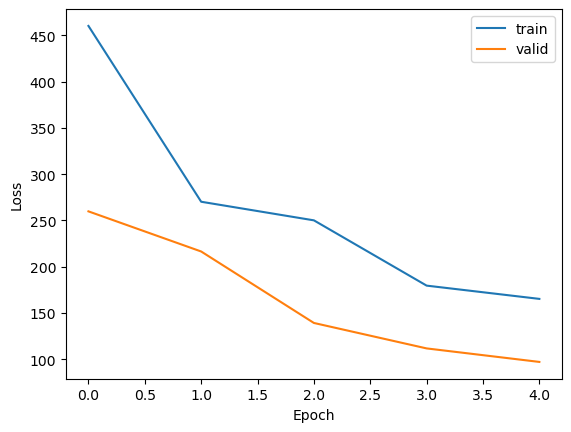

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()

In [16]:
print("Loading vision and text encoders...")
vision_encoder = keras.models.load_model("vision_encoder")
text_encoder = keras.models.load_model("text_encoder")
print("Models are loaded.")


def read_image(image_path):
    image_array = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    return tf.image.resize(image_array, (299, 299))


print(f"Generating embeddings for {len(image_paths)} images...")
image_embeddings = vision_encoder.predict(
    tf.data.Dataset.from_tensor_slices(image_paths).map(read_image).batch(batch_size),
    verbose=1,
)
print(f"Image embeddings shape: {image_embeddings.shape}.")

Loading vision and text encoders...
Models are loaded.
Generating embeddings for 1063 images...
5/5 [==============================] - 1088s 210s/step
Image embeddings shape: (1063, 256).


In [17]:
def find_matches(image_embeddings, queries, k=9, normalize=True):
    # Get the embedding for the query.
    query_embedding = text_encoder(tf.convert_to_tensor(queries))
    # Normalize the query and the image embeddings.
    if normalize:
        image_embeddings = tf.math.l2_normalize(image_embeddings, axis=1)
        query_embedding = tf.math.l2_normalize(query_embedding, axis=1)
    # Compute the dot product between the query and the image embeddings.
    dot_similarity = tf.matmul(query_embedding, image_embeddings, transpose_b=True)
    # Retrieve top k indices.
    results = tf.math.top_k(dot_similarity, k).indices.numpy()
    # Return matching image paths.
    return [[image_paths[idx] for idx in indices] for indices in results]

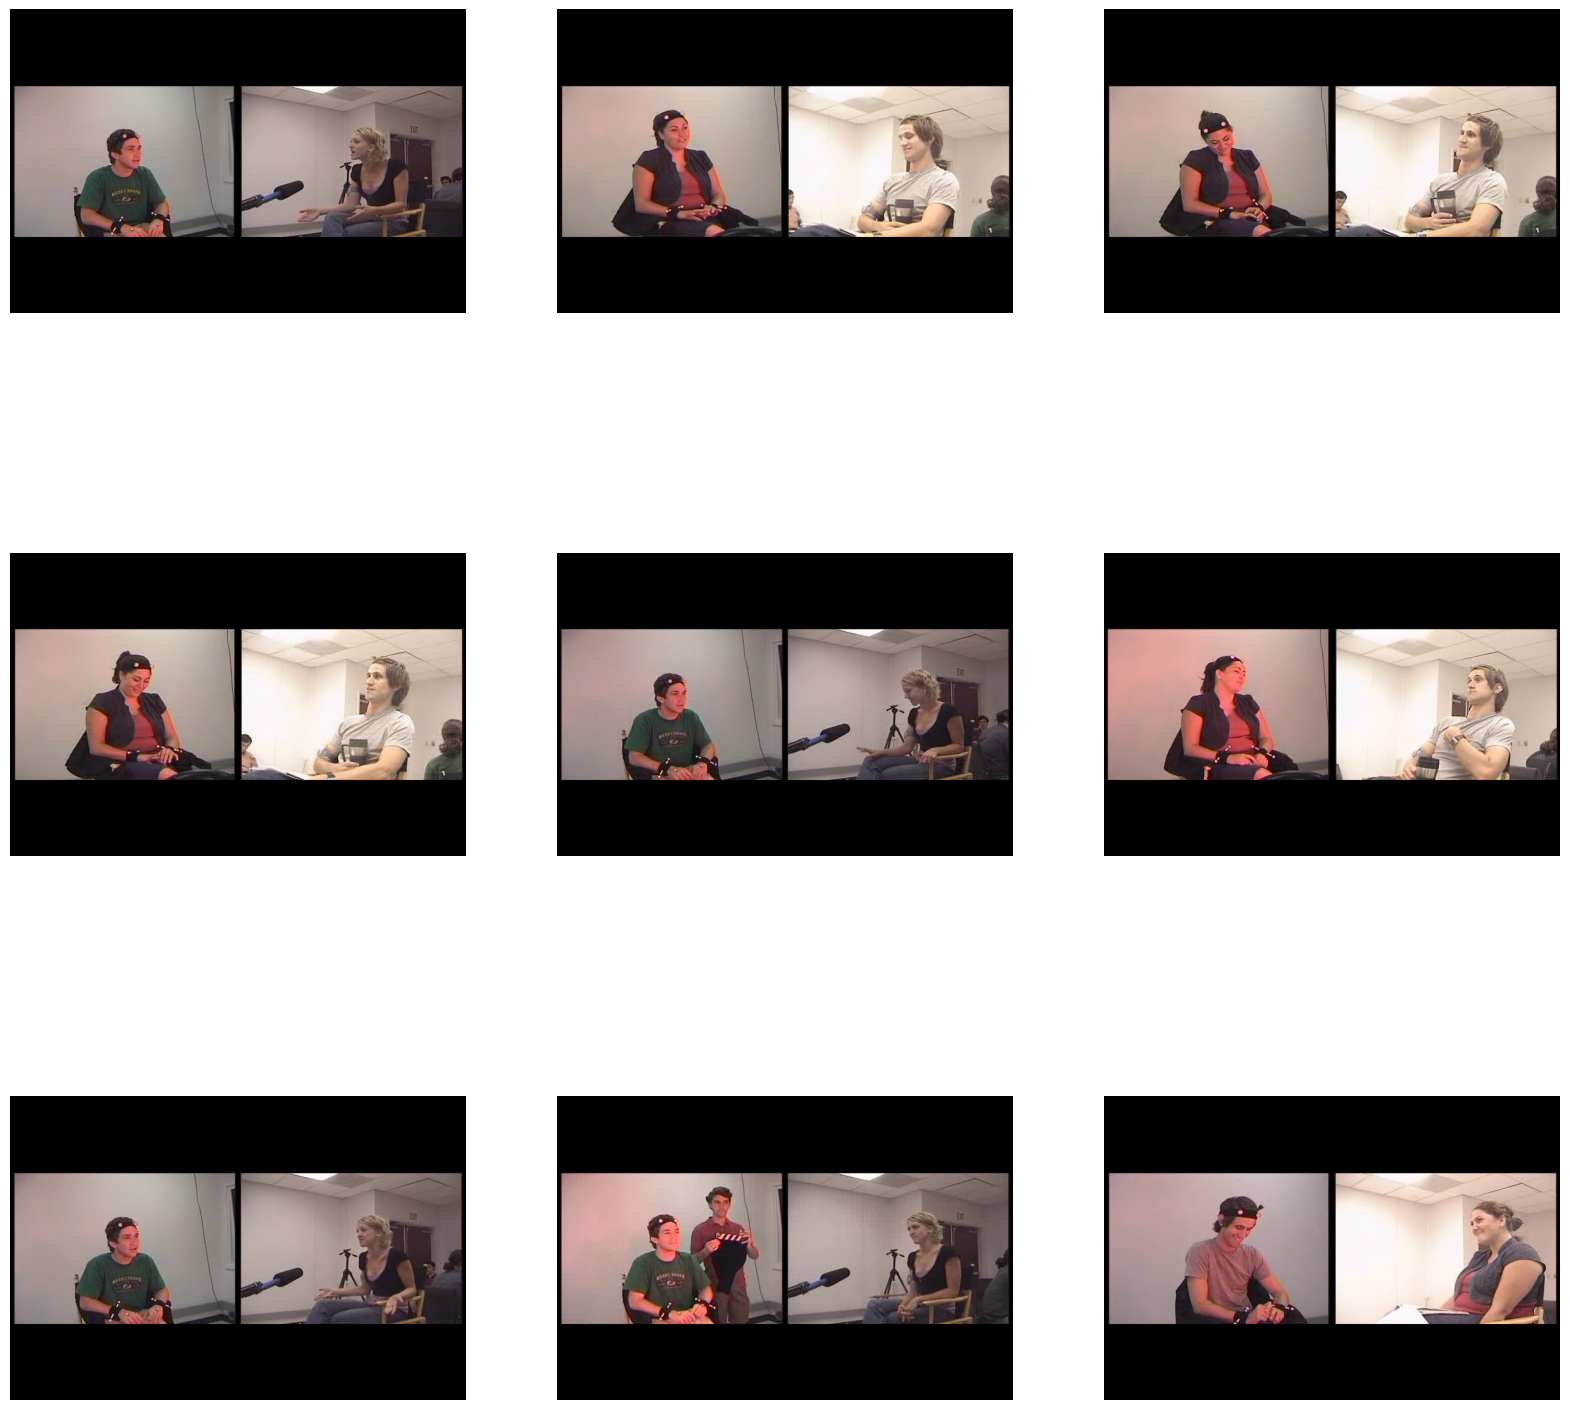

In [23]:
query = "a happy person"
matches = find_matches(image_embeddings, [query], normalize=True)[0]

plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(matches[i]))
    plt.axis("off")

In [24]:
def compute_top_k_accuracy(image_paths, k=100):
    if len(image_paths) == 0:
        return 0.0  # Avoid division by zero

    hits = 0
    num_batches = int(np.ceil(len(image_paths) / batch_size))
    for idx in tqdm(range(num_batches)):
        start_idx = idx * batch_size
        end_idx = start_idx + batch_size
        current_image_paths = image_paths[start_idx:end_idx]
        queries = [
            image_path_to_caption[image_path][0] for image_path in current_image_paths
        ]
        result = find_matches(image_embeddings, queries, k)
        hits += sum(
            [
                image_path in matches
                for (image_path, matches) in list(zip(current_image_paths, result))
            ]
        )

    return hits / len(image_paths)


# Assuming train_size is defined and valid
train_size = int(0.8 * len(image_paths))  # Example: 80% training, 20% evaluation

print("Scoring training data...")
train_accuracy = compute_top_k_accuracy(train_image_paths)
print(f"Train accuracy: {round(train_accuracy * 100, 3)}%")

print("Scoring evaluation data...")
if train_size < len(image_paths):
    eval_accuracy = compute_top_k_accuracy(image_paths[train_size:])
    print(f"Eval accuracy: {round(eval_accuracy * 100, 3)}%")
else:
    print("No evaluation data available, train_size is too large.")


Scoring training data...


100%|██████████| 5/5 [02:57<00:00, 35.51s/it]


Train accuracy: 11.101%
Scoring evaluation data...


100%|██████████| 1/1 [00:36<00:00, 36.49s/it]

Eval accuracy: 20.188%
